In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob

In [111]:
def get_points_match(image1,image2):
    sift_method = cv2.SIFT_create()
    points1, des1 = sift_method.detectAndCompute(image1,None)
    points2, des2 = sift_method.detectAndCompute(image2,None)
    index = dict(algorithm = 1, trees = 5)
    match_points = cv2.FlannBasedMatcher(index, dict(checks = 50)).knnMatch(des1,des2,k=2)
    points = []
    for match,n in match_points:
        if match.distance < 0.5*n.distance:
            points.append(match)
    
    return points,points1,points2

In [112]:
def pair_points(image1,image2,points,points1,points2):
    image_1_points = np.float32([points1[m.queryIdx].pt for m in points]).reshape(-1,1,2)
    image_2_points = np.float32([points2[m.trainIdx].pt for m in points]).reshape(-1,1,2)
    M, mask = cv2.findHomography(image_2_points,image_1_points, cv2.RANSAC,5.0)
    array_of_shapes = [[0,0],[0,image2.shape[0]-1],[image2.shape[1]-1,image2.shape[0]-1],[image2.shape[1]-1,0]]
    points_pos = np.float32(array_of_shapes).reshape(-1,1,2)
    output_transform = cv2.perspectiveTransform(points_pos,M)   
    lines = dict(matchColor = [255,255,0], singlePointColor = None,matchesMask = mask.ravel().tolist(),flags = 2)
    pair_images = cv2.drawMatches(image1,points1,image2,points2,points,None,**lines)
    cv2.fillPoly(image1, pts =[np.int32(output_transform)], color=(255,255,255))
    return image1,pair_images

In [113]:
def find_item_in_image(image1,image2):
    match_counts=17
    points,points1,points2 = get_points_match(image1,image2)
    if len(points)<match_counts:
        return None,None,False
    else:
        image1,pair_images = pair_points(image1,image2,points,points1,points2)
        return image1,pair_images,True

In [114]:
def get_count_of_items(input_img,titles,items):
    count_of_items = np.zeros(shape=(len(titles),)).astype(np.int32)
    iter =0
    for i in range(len(titles)):
        image,pair_images,exits_new_item= find_item_in_image(input_img,items[i])
        while exits_new_item:
            count_of_items[i] = count_of_items[i] + 1
            iter+=1
            input_img = image
            plt.imshow(pair_images,cmap="gray")
            plt.show()
            file_address = "outputs/"+str(iter)+".png"
            cv2.imwrite(file_address, pair_images)
            image,pair_images,exits_new_item = find_item_in_image(input_img,items[i])   
    return count_of_items 

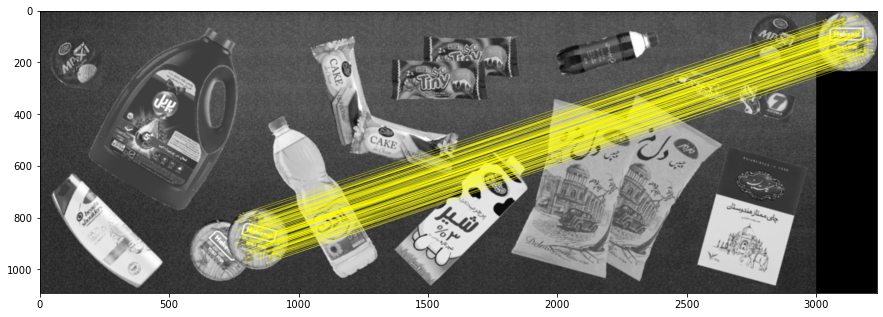

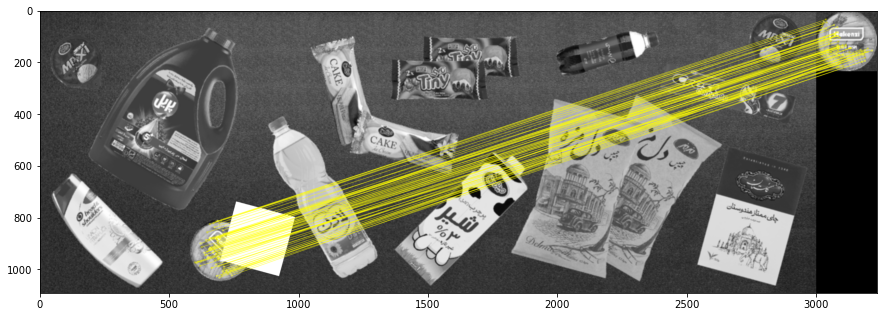

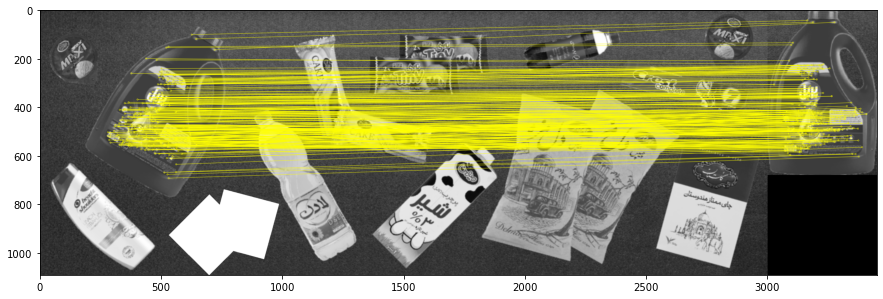

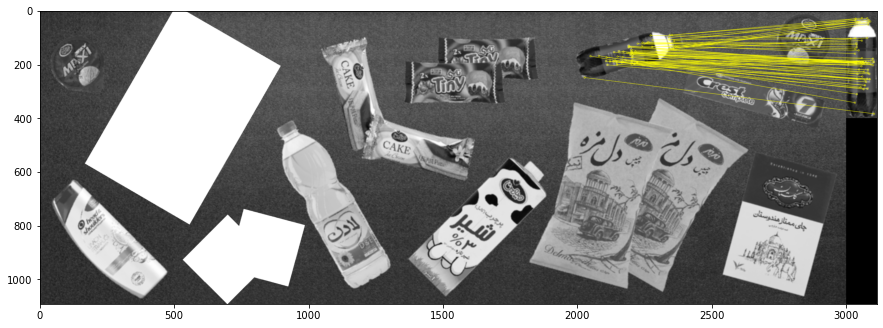

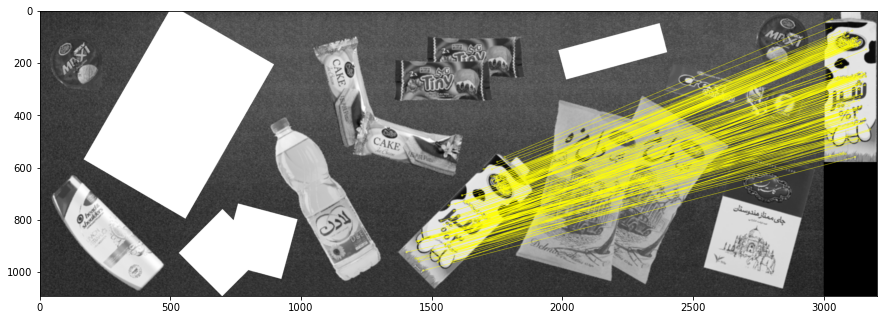

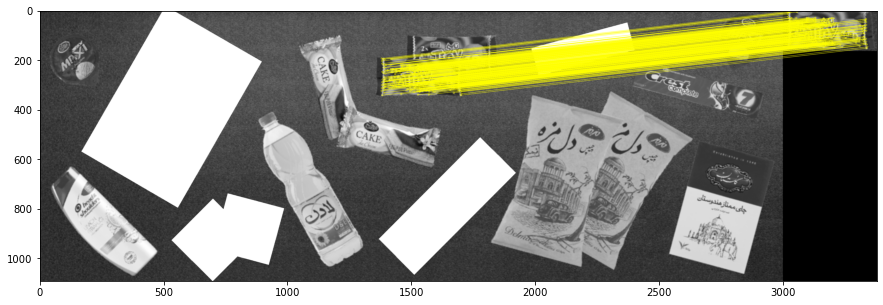

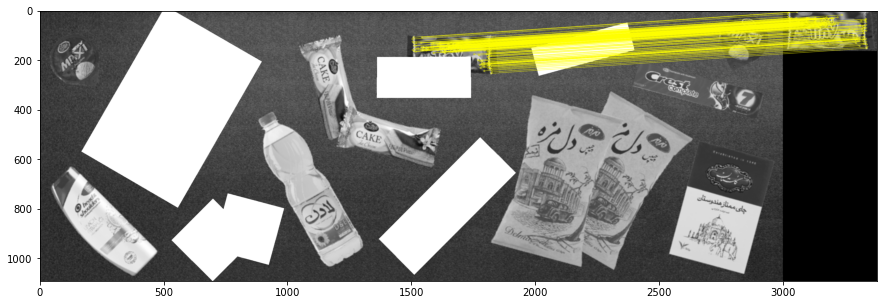

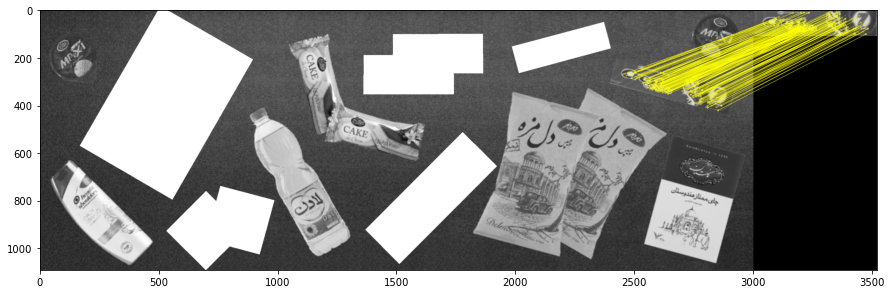

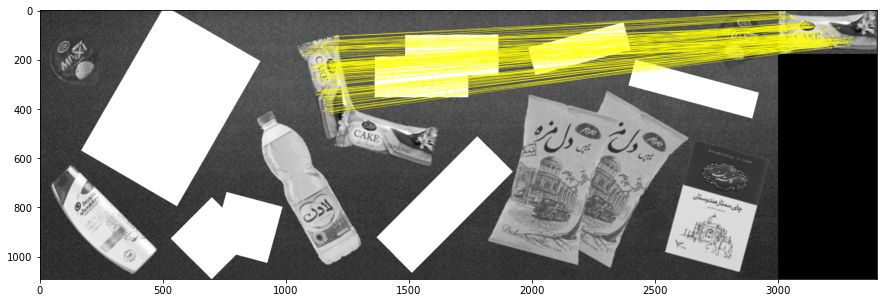

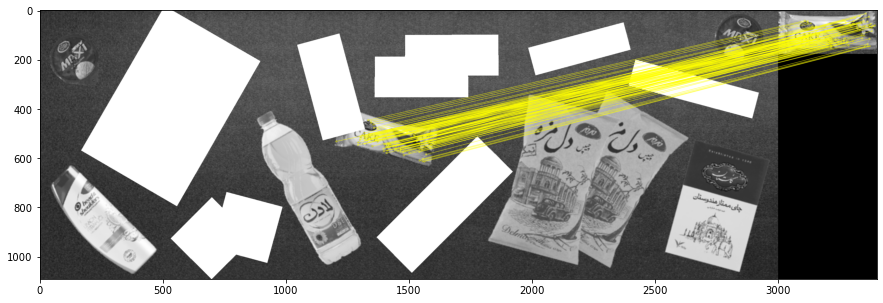

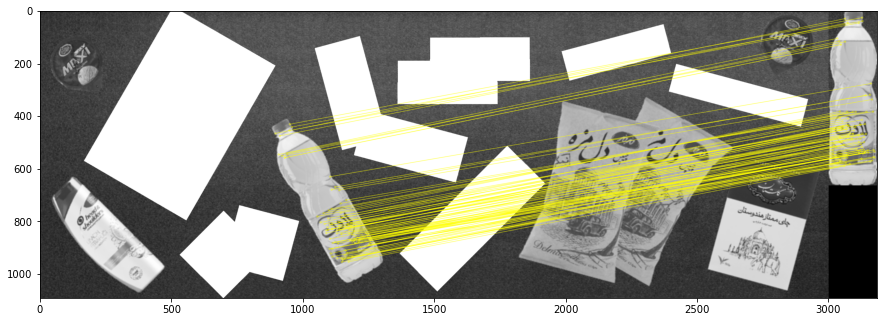

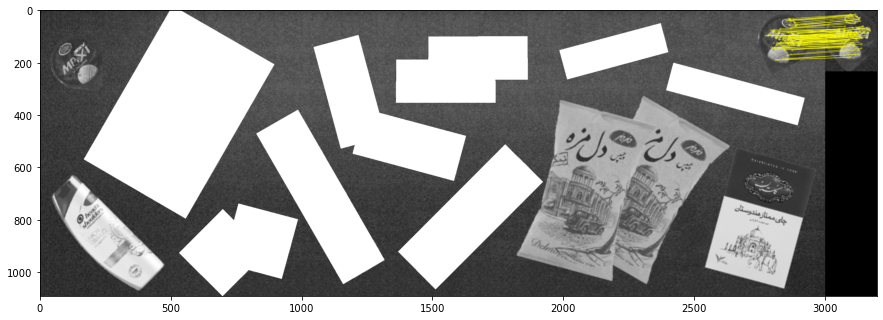

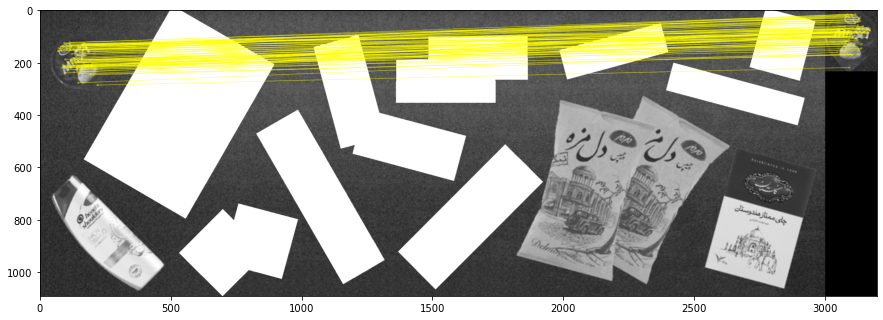

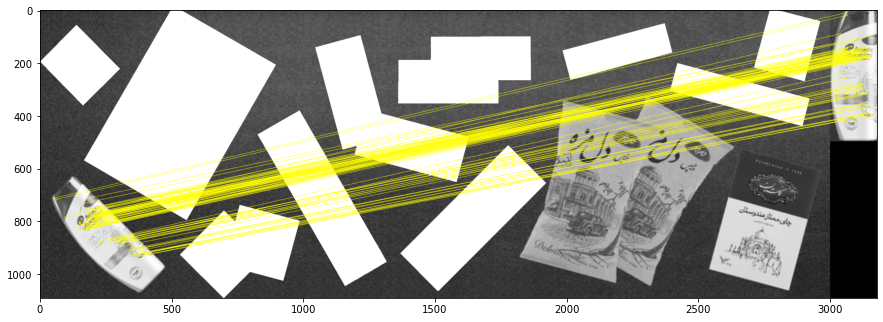

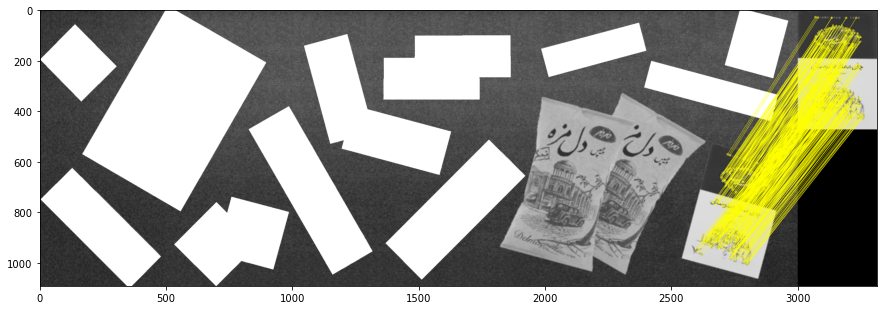

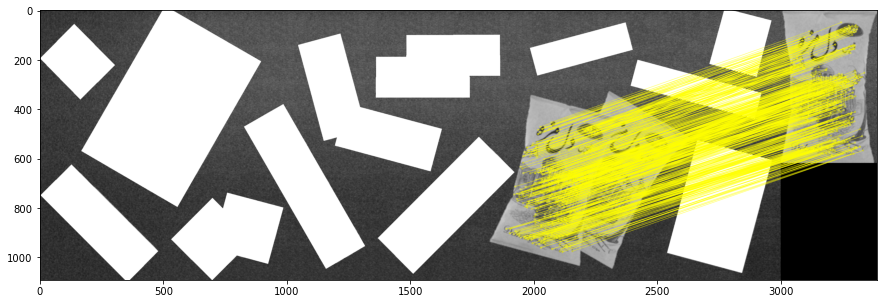

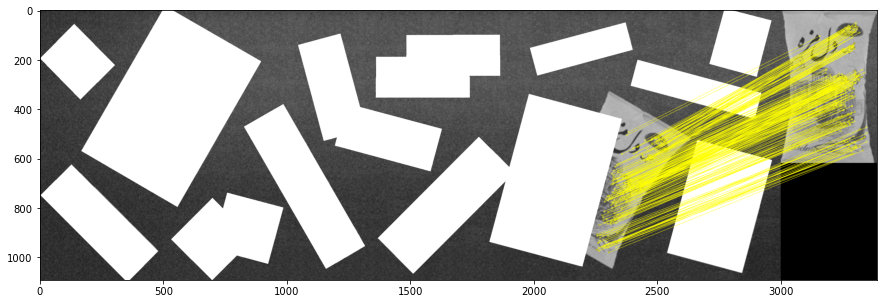

In [115]:
titles = ["تن ماهی","مایع ظرف شویی","نوشابا","شیر","کیک تاینی","خمیردندون","کیک بستنی","روغن", "بستنی","شامپو","چای","چیپس"]

image = cv2.imread('inputs/P3/cart_2.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.blur(gray,(5,5))
image_final = gray[:][52:-57]

items = []
for p in glob.glob("./inputs/cart_items/*.png"):
    image = cv2.imread(p,0)
    items.append(cv2.blur(image,(5,5)))

counts_of_products = get_count_of_items(image_final,titles,items)

In [82]:
Prices = [40000,83000,6500,30000,5000,50000,8000,108000,6000,139000,144000,36000]
sum_of_factor = 0
for i in range(len(titles)):
    sum_of_factor +=(counts_of_products[i] * Prices[i] )
    text = titles[i] + " : تعداد = " + str(counts_of_products[i]) + " عدد - قیمت واحد = "+ str(Prices[i])+" تومان" + " - قیمت کل = " + str(counts_of_products[i] * Prices[i] )
    print(text)

print("جمع کل فاکتور = " + str(sum_of_factor))
print("تعداد کل اقلام = " + str(sum(counts_of_products)))
print("-----------------------------------------------------------------------")
print("-----------------------------------------------------------------------")

price_drinks = counts_of_products[6]*Prices[6]+ counts_of_products[8]*Prices[8]
print("هزینه بستنی ها : ", price_drinks)


تن ماهی : تعداد = 2 عدد - قیمت واحد = 40000 تومان - قیمت کل = 80000
مایع ظرف شویی : تعداد = 1 عدد - قیمت واحد = 83000 تومان - قیمت کل = 83000
نوشابا : تعداد = 1 عدد - قیمت واحد = 6500 تومان - قیمت کل = 6500
شیر : تعداد = 1 عدد - قیمت واحد = 30000 تومان - قیمت کل = 30000
کیک تاینی : تعداد = 2 عدد - قیمت واحد = 5000 تومان - قیمت کل = 10000
خمیردندون : تعداد = 1 عدد - قیمت واحد = 50000 تومان - قیمت کل = 50000
کیک بستنی : تعداد = 2 عدد - قیمت واحد = 8000 تومان - قیمت کل = 16000
روغن : تعداد = 1 عدد - قیمت واحد = 108000 تومان - قیمت کل = 108000
بستنی : تعداد = 2 عدد - قیمت واحد = 6000 تومان - قیمت کل = 12000
شامپو : تعداد = 1 عدد - قیمت واحد = 139000 تومان - قیمت کل = 139000
چای : تعداد = 1 عدد - قیمت واحد = 144000 تومان - قیمت کل = 144000
چیپس : تعداد = 2 عدد - قیمت واحد = 36000 تومان - قیمت کل = 72000
جمع کل فاکتور = 750500
تعداد کل اقلام = 17
-----------------------------------------------------------------------
-----------------------------------------------------------------------
هزی